In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
fashion_train_df= pd.read_csv('input/fashion-mnist_train.csv', sep= ',')
fashion_test_df= pd.read_csv('input/fashion-mnist_test.csv', sep= ',')

In [3]:
# Visualizing the dataset

In [4]:
 fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
 fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
 fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
 fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [8]:
 fashion_train_df.shape

(60000, 785)

In [10]:
 fashion_test_df.shape

(10000, 785)

In [11]:
training= np.array(fashion_train_df, dtype= 'float32')

In [12]:
testing= np.array(fashion_test_df, dtype= 'float32')

In [29]:
import random
i= random.randint(1,60000)

6.0

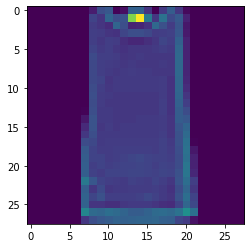

In [30]:
plt.imshow(training[i, 1:].reshape(28,28))
label= training[i,0]
label

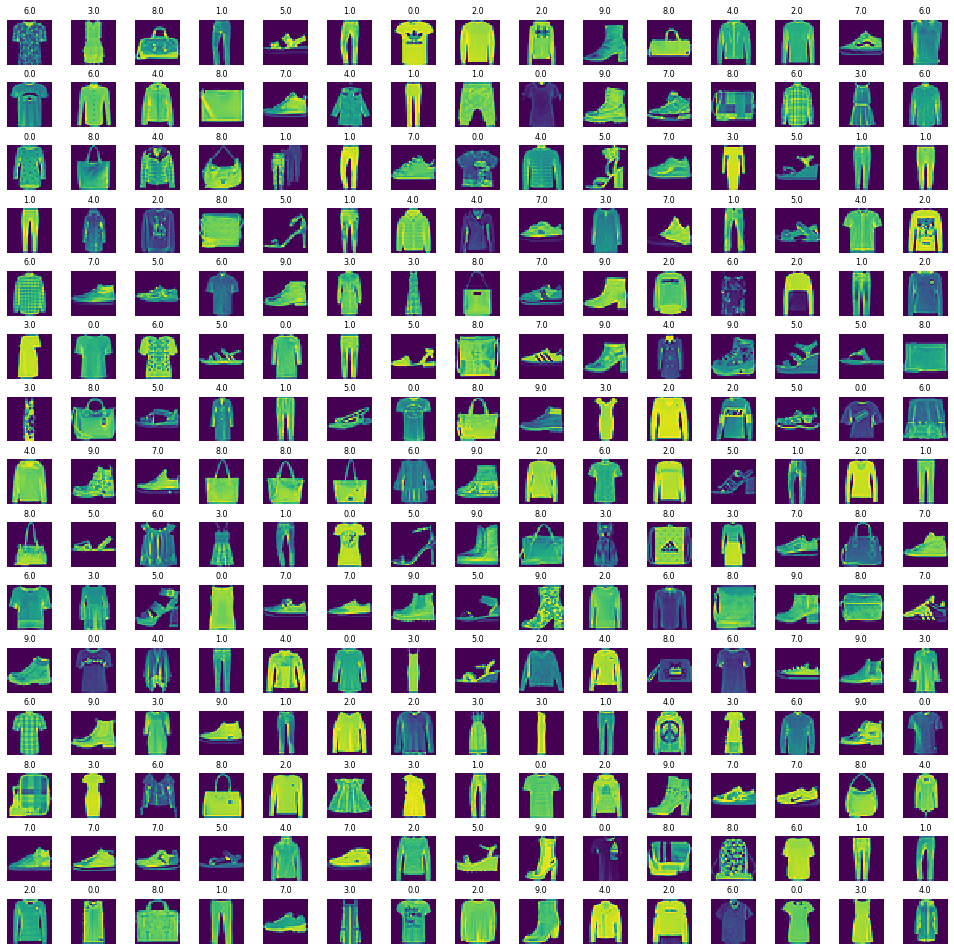

In [33]:
# View data in a grid fromat
#Defining the dimension of the plot grid
w_grid=15
l_grid=15
fig,axis= plt.subplots(l_grid, w_grid, figsize=(17,17))
axis= axis.ravel() #flatten the 15 x 15 matrix into 225 array
n_training= len(training)
#select a random number from 0 to n_training
for i in np.arange(0, w_grid*l_grid): #create evenly space variable
    
    #select a random number
    index=np.random.randint(0, n_training)
    #Read and display an image with the selected index
    axis[i].imshow(training[index, 1:].reshape(28,28))
    axis[i].set_title(training[index,0], fontsize=8)
    axis[i].axis('off')

plt.subplots_adjust(hspace=0.4)
    

In [34]:
# Training the model
x_train=training[:, 1:]/255
y_train=training[:, 0]


In [35]:
x_test=testing[:, 1:]/255
y_test=testing[:, 0]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_validate, y_train, y_validate= train_test_split(x_train,y_train, test_size=0.2, random_state= 12345)

In [40]:
x_train= x_train.reshape(x_train.shape[0], *(28,28,1))
x_validate= x_validate.reshape(x_validate.shape[0], *(28,28,1))
x_test= x_test.reshape(x_test.shape[0], *(28,28,1))


In [41]:
x_train.shape


(48000, 28, 28, 1)

In [43]:
x_validate.shape

(12000, 28, 28, 1)

In [44]:
x_test.shape

(10000, 28, 28, 1)

In [50]:
import keras

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [51]:
cnn_model= Sequential()

In [54]:
cnn_model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation= 'relu'))

In [55]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [56]:
cnn_model.add(Flatten())

In [58]:
cnn_model.add(Dense(units=32, activation='relu'))

In [59]:
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [70]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [62]:
epochs= 50

In [71]:
cnn_model.fit(x_train,y_train, batch_size=512, epochs=epochs, verbose=1, validation_data=(x_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 132s 3ms/step - loss: 0.9828 - accuracy: 0.6259 - val_loss: 0.5815 - val_accuracy: 0.7840
Epoch 2/50
48000/48000 [==============================] - 131s 3ms/step - loss: 0.4904 - accuracy: 0.8282 - val_loss: 0.4553 - val_accuracy: 0.8382
Epoch 3/50
48000/48000 [==============================] - 131s 3ms/step - loss: 0.4171 - accuracy: 0.8542 - val_loss: 0.3952 - val_accuracy: 0.8622
Epoch 4/50
48000/48000 [==============================] - 130s 3ms/step - loss: 0.3740 - accuracy: 0.8699 - val_loss: 0.3799 - val_accuracy: 0.8691
Epoch 5/50
48000/48000 [==============================] - 132s 3ms/step - loss: 0.3411 - accuracy: 0.8804 - val_loss: 0.3403 - val_accuracy: 0.8829
Epoch 6/50
48000/48000 [==============================] - 129s 3ms/step - loss: 0.3186 - accuracy: 0.8881 - val_loss: 0.3280 - val_accuracy: 0.8848
Epoch 7/50
48000/48000 [==============================] - 131s

In [73]:
#Evaluating the model
evaluation= cnn_model.evaluate(x_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 7s 690us/step
Test Accuracy: 0.910


In [74]:
predict_classes= cnn_model.predict_classes(x_test)

In [75]:
predict_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

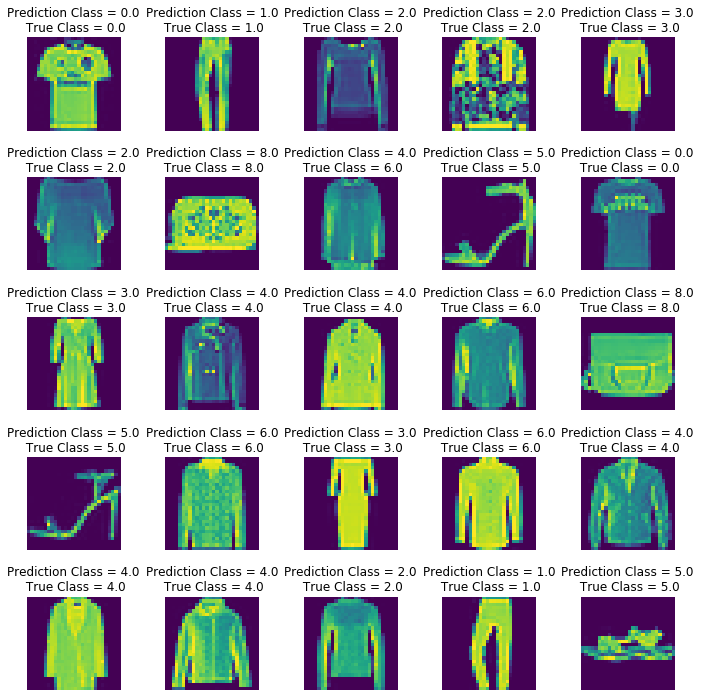

In [77]:
w =5
l =5
fig,axis= plt.subplots(l, w, figsize=(12,12))
axis= axis.ravel() #flatten the 5 x 5 matrix into 225 array
for i in np.arange(0, w*l): #create evenly space variable
     
    axis[i].imshow(x_test[i].reshape(28,28))
    axis[i].set_title('Prediction Class = {:0.1f}\n True Class = {:0.1f}'.format(predict_classes[i],y_test[i]))
    axis[i].axis('off')

plt.subplots_adjust(hspace=0.5)

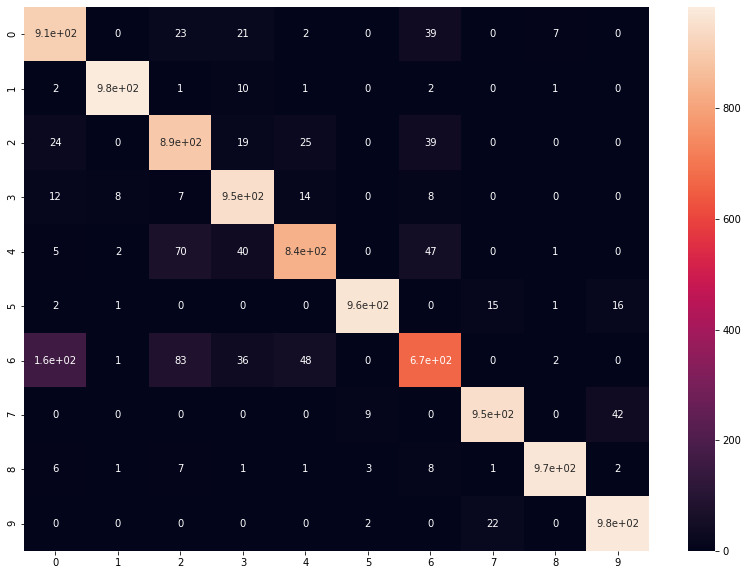

In [79]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, predict_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm, annot=True)

In [80]:
from sklearn.metrics import classification_report
num_classes=10
target_names= ["Classes{}".format(i) for i in range(num_classes)]
print(classification_report(y_test,predict_classes,target_names=target_names))

              precision    recall  f1-score   support

    Classes0       0.81      0.91      0.86      1000
    Classes1       0.99      0.98      0.98      1000
    Classes2       0.82      0.89      0.86      1000
    Classes3       0.88      0.95      0.92      1000
    Classes4       0.90      0.83      0.87      1000
    Classes5       0.99      0.96      0.98      1000
    Classes6       0.82      0.67      0.74      1000
    Classes7       0.96      0.95      0.96      1000
    Classes8       0.99      0.97      0.98      1000
    Classes9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
'''Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot
'''